In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
df = pd.read_csv(r"C:\Users\Aparna Mondal\Downloads\EV_Dataset.csv")

In [3]:
print("Dataset Overview:")
display(df.head())
print("\nDataset Info:")
df.info()


Dataset Overview:


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [6]:
df.shape

(96845, 8)

In [8]:
print("Dataset Overview:")
display(df.head())
print("\nDataset Info:")
df.info()

Dataset Overview:


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [10]:
print("\nBasic Statistics:")
display(df.describe())



Basic Statistics:


,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


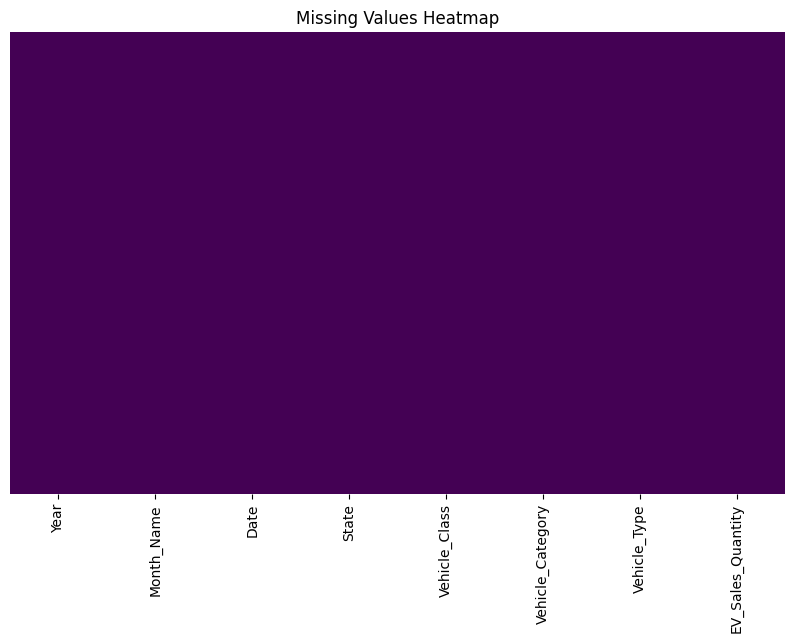

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [12]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

In [14]:
print("\nCategorical Variables (excluding Vehicle Type):")
print(categorical_columns)
print("\nNumerical Variables:")
print(numerical_columns)


Categorical Variables (excluding Vehicle Type):
Index(['Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category',
       'Vehicle_Type'],
      dtype='object')

Numerical Variables:
Index(['Year', 'EV_Sales_Quantity'], dtype='object')


In [15]:
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(df_scaled)

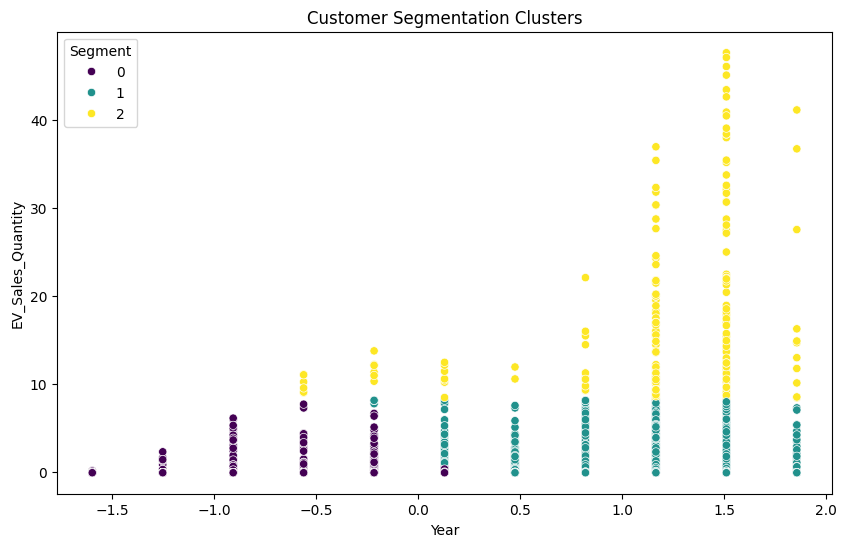

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['Segment'], palette='viridis')
plt.title("Customer Segmentation Clusters")
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.show()


In [19]:
print("\nSegmentation Analysis Completed. Further insights can be derived from segment characteristics.")


Segmentation Analysis Completed. Further insights can be derived from segment characteristics.


In [20]:
print("\nSegment Characteristics:")
segment_summary = df.groupby('Segment').mean()
display(segment_summary)


Segment Characteristics:


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
Segment,,,,,,,,
0,2016.585551,5.512978,58.567855,17.288681,32.210278,2.874944,8.328932,4.339498
1,2021.614092,5.465014,61.687527,17.032972,30.735099,2.774485,8.077259,42.612270
2,2022.213675,5.705128,60.136752,19.743590,26.222222,0.367521,2.205128,7192.149573


C:\Users\Aparna Mondal\AppData\Local\Temp\ipykernel_23592\837608613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Segment'], y=df[numerical_columns[0]], data=df, palette='coolwarm')


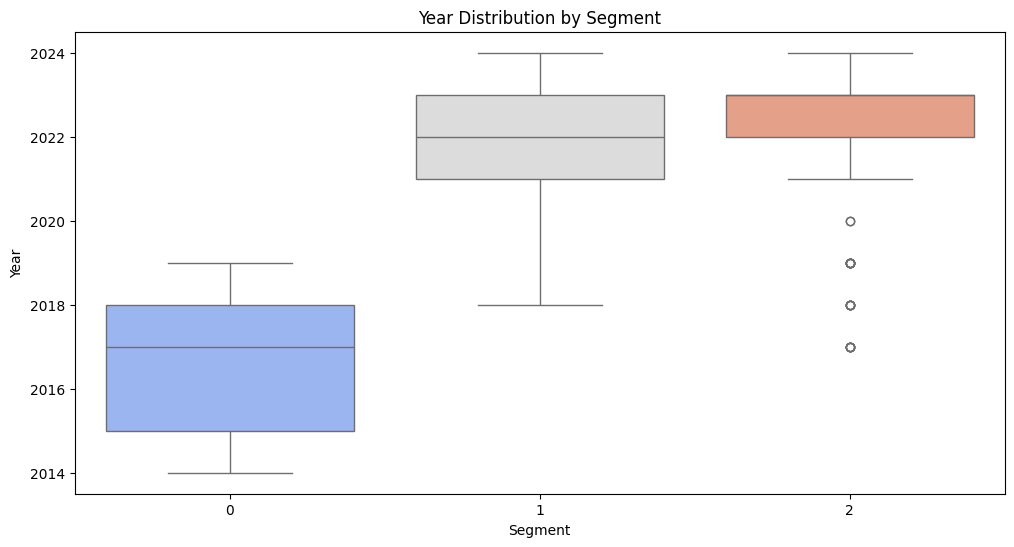

In [21]:
plt.figure(figsize=(12, 6))# Visualizing Segment Distributions
sns.boxplot(x=df['Segment'], y=df[numerical_columns[0]], data=df, palette='coolwarm')
plt.title(f"{numerical_columns[0]} Distribution by Segment")
plt.show()

In [22]:
print("\nSegment Size Distribution:")
print(df['Segment'].value_counts())


Segment Size Distribution:
Segment
0    57638
1    38973
2      234
Name: count, dtype: int64


C:\Users\Aparna Mondal\AppData\Local\Temp\ipykernel_23592\1730058911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Segment'], palette='viridis')


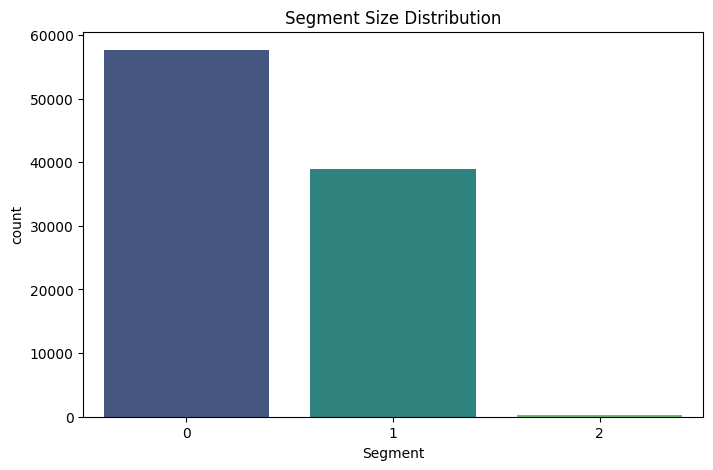

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Segment'], palette='viridis')
plt.title("Segment Size Distribution")
plt.show()


In [24]:
print("\nBusiness Insights: Further analysis can be performed to link segment characteristics with real-world EV market trends.")


Business Insights: Further analysis can be performed to link segment characteristics with real-world EV market trends.


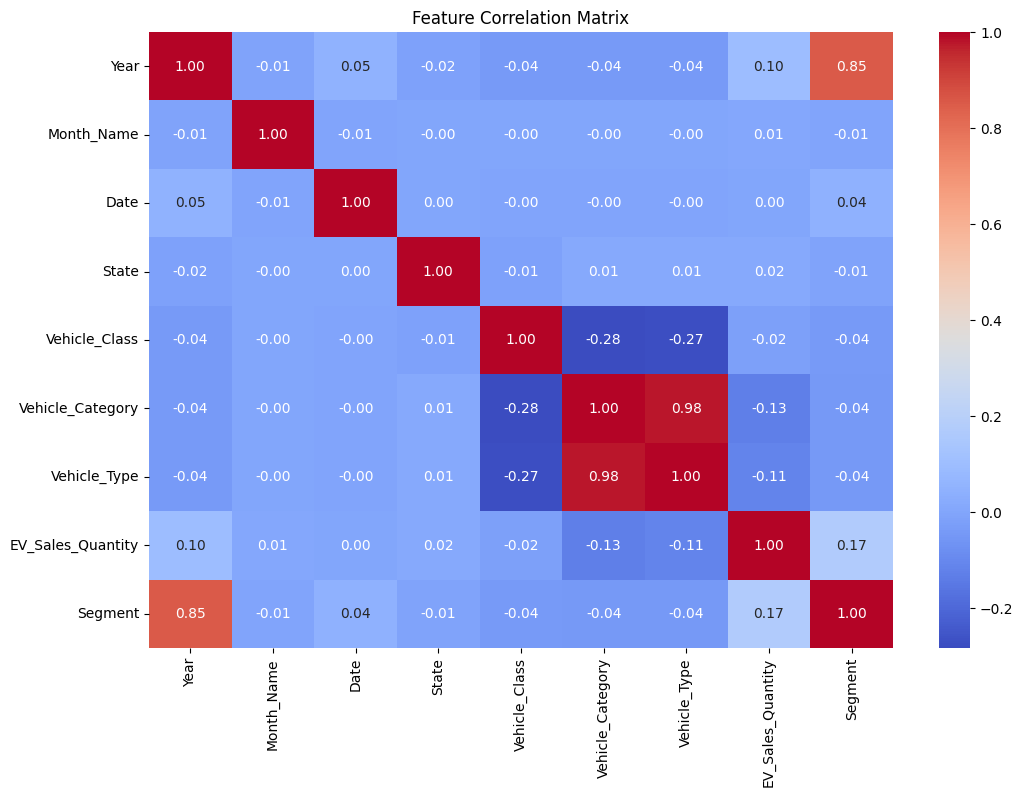

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()


C:\Users\Aparna Mondal\AppData\Local\Temp\ipykernel_23592\3773585168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Segment'], y=df[numerical_columns[0]], palette='coolwarm')


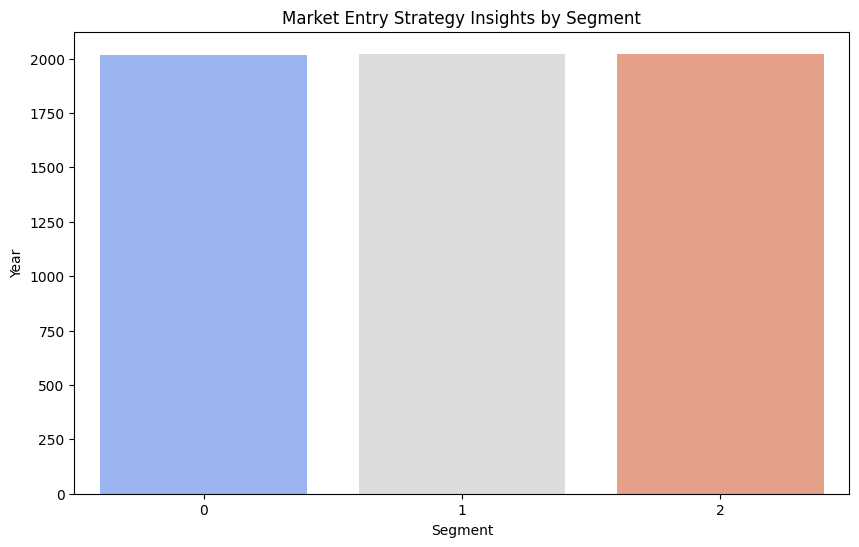

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Segment'], y=df[numerical_columns[0]], palette='coolwarm')
plt.title("Market Entry Strategy Insights by Segment")
plt.xlabel("Segment")
plt.ylabel(numerical_columns[0])
plt.show()

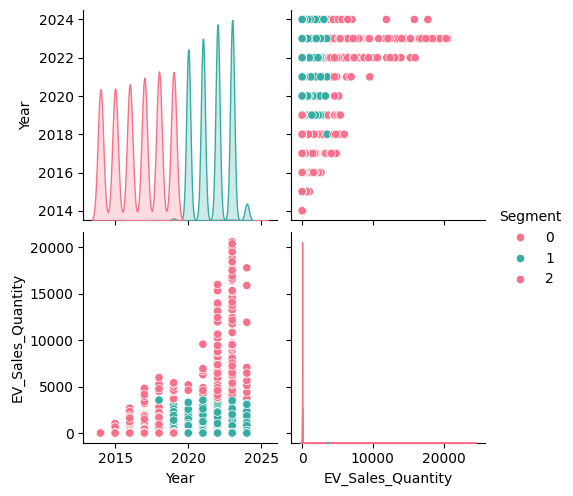

In [27]:
sns.pairplot(df, vars=numerical_columns[:3], hue='Segment', palette='husl')
plt.show()


In [28]:
print("\nMarket Entry Strategy Analysis Completed.")


Market Entry Strategy Analysis Completed.


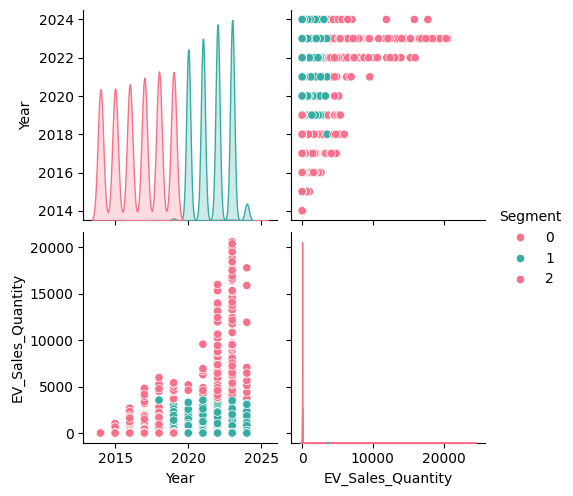

In [29]:
sns.pairplot(df, vars=numerical_columns[:3], hue='Segment', palette='husl')
plt.show()


In [30]:
print("\nMarket Entry Strategy Analysis Completed.")



Market Entry Strategy Analysis Completed.
